#### 1.  Importing Liabriaries and Supress Warnings

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 50)

#### 2. Loading Data

#### 2.1 Importing CSV Data from file

In [4]:
# Importing data
Leads_Score = pd.read_csv("Leads.csv")
Leads_Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### 2.2 Inspecting various aspects of the Data Frame

In [5]:
Leads_Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
Leads_Score.shape

(9240, 37)

In [7]:
Leads_Score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
Leads_Score.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

#### 3. Data Cleaning

In [9]:
# Standardising column names
Leads_Score.columns = ['_'.join(name.lower().split()[:3]) for name in Leads_Score.columns]
Leads_Score.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent,page_views_per,last_activity,country,specialization,how_did_you,what_is_your,what_matters_most,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates,tags,lead_quality,update_me_on,get_updates_on,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to,a_free_copy,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
#standardising categorical values
cat_cols = Leads_Score.select_dtypes(include=['object']).columns
Leads_Score[cat_cols] = Leads_Score[cat_cols].apply(lambda x: x.str.lower().str.replace(' ', '_').str.strip())

In [11]:
Leads_Score.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent,page_views_per,last_activity,country,specialization,how_did_you,what_is_your,what_matters_most,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates,tags,lead_quality,update_me_on,get_updates_on,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to,a_free_copy,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark_chat,no,no,0,0.0,0,0.0,page_visited_on_website,NaN,select,select,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,interested_in_other_courses,low_in_relevance,no,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic_search,no,no,0,5.0,674,2.5,email_opened,india,select,select,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,ringing,NaN,no,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email_opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,email_opened,india,business_administration,select,student,better_career_prospects,no,no,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,no,no,potential_lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email_opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,unreachable,india,media_and_advertising,word_of_mouth,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,ringing,not_sure,no,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing_page_submission,google,no,no,1,2.0,1428,1.0,converted_to_lead,india,select,other,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,no,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


#### 3.1  Dealing with NaN Values

In [12]:
# Replacing all 'select' values with NaN
Leads_Score = Leads_Score.replace('select', np.nan)

In [13]:
Leads_Score.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent,page_views_per,last_activity,country,specialization,how_did_you,what_is_your,what_matters_most,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates,tags,lead_quality,update_me_on,get_updates_on,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to,a_free_copy,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark_chat,no,no,0,0.0,0,0.0,page_visited_on_website,NaN,NaN,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,interested_in_other_courses,low_in_relevance,no,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic_search,no,no,0,5.0,674,2.5,email_opened,india,NaN,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,ringing,NaN,no,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email_opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,email_opened,india,business_administration,NaN,student,better_career_prospects,no,no,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,no,no,potential_lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email_opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,unreachable,india,media_and_advertising,word_of_mouth,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,ringing,not_sure,no,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing_page_submission,google,no,no,1,2.0,1428,1.0,converted_to_lead,india,NaN,other,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,no,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


#### 3.2  Treatment of Null Values

In [14]:
# % null value in each column
null_percentage = round(
    100 * (Leads_Score.isnull().sum() / Leads_Score.shape[0]),
    2).sort_values(ascending=False)

null_percentage

how_did_you                    78.46
lead_profile                   74.19
lead_quality                   51.59
asymmetrique_profile_score     45.65
asymmetrique_activity_score    45.65
asymmetrique_activity_index    45.65
asymmetrique_profile_index     45.65
city                           39.71
specialization                 36.58
tags                           36.29
what_matters_most              29.32
what_is_your                   29.11
country                        26.63
page_views_per                  1.48
totalvisits                     1.48
last_activity                   1.11
lead_source                     0.39
receive_more_updates            0.00
i_agree_to                      0.00
get_updates_on                  0.00
update_me_on                    0.00
a_free_copy                     0.00
prospect_id                     0.00
newspaper_article               0.00
through_recommendations         0.00
digital_advertisement           0.00
newspaper                       0.00
x

In [15]:
# Creating a reusable Function to remove the columns having specified percentage of null values
def removeNullCols(df, percent):
    pre_del_shape = df.shape
    colnames = (df.isnull().sum() / len(df))
    colnames = list(colnames[colnames.values >= percent].index)
    df.drop(labels=colnames, axis=1, inplace=True)
    print("Number of Columns dropped\t: ", len(colnames))
    print("---------------------------------------------")
    print("\nBefore Deletion rows,columns", pre_del_shape,
          "\nAfter Deletion rows,columns", df.shape)
    return df

In [16]:
Leads_Score = removeNullCols(Leads_Score, percent = 0.70)

Number of Columns dropped	:  2
---------------------------------------------

Before Deletion rows,columns (9240, 37) 
After Deletion rows,columns (9240, 35)


In [17]:
# % null value in each column
null_percentage = round(
    100 * (Leads_Score.isnull().sum() / Leads_Score.shape[0]),
    2).sort_values(ascending=False)

null_percentage

lead_quality                   51.59
asymmetrique_activity_index    45.65
asymmetrique_profile_score     45.65
asymmetrique_activity_score    45.65
asymmetrique_profile_index     45.65
city                           39.71
specialization                 36.58
tags                           36.29
what_matters_most              29.32
what_is_your                   29.11
country                        26.63
totalvisits                     1.48
page_views_per                  1.48
last_activity                   1.11
lead_source                     0.39
receive_more_updates            0.00
i_agree_to                      0.00
get_updates_on                  0.00
update_me_on                    0.00
a_free_copy                     0.00
prospect_id                     0.00
newspaper_article               0.00
through_recommendations         0.00
digital_advertisement           0.00
newspaper                       0.00
x_education_forums              0.00
lead_number                     0.00
m

#### 4. Check the number of unique categories in each categorical column

In [18]:
# Taking a look at all unique values for every column to check for abnormalities/inconsistencies
for col in Leads_Score.columns[2:]:
    print(col.upper(), end=': ')
    print(Leads_Score[col].unique())
    print()

LEAD_ORIGIN: ['api' 'landing_page_submission' 'lead_add_form' 'lead_import'
 'quick_add_form']

LEAD_SOURCE: ['olark_chat' 'organic_search' 'direct_traffic' 'google' 'referral_sites'
 'welingak_website' 'reference' 'facebook' nan 'blog' 'pay_per_click_ads'
 'bing' 'social_media' 'welearn' 'click2call' 'live_chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm']

DO_NOT_EMAIL: ['no' 'yes']

DO_NOT_CALL: ['no' 'yes']

CONVERTED: [0 1]

TOTALVISITS: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]

TOTAL_TIME_SPENT: [   0  674 1532 ...  603  483  927]

PAGE_VIEWS_PER: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.  

*** 
Observation:
***
By going through the above unique entires of every column, we have observed the following inconsistencies:

1. lead_source -> WeLearn and WeLearnblog_home are one and the same. Facebook and social media are two different categories.

2. country -> "Australia", the asian Countries and "Asia/Pacific Region" are two different categories.

3. tags -> "invalid number" and "wrong number given" are one and the same.

4. last_activity and last_notable_activity are highly correlated. One of them should be dropped to avoid multi-collinearity.

5. Many columns exist with only a single category (Redundant columns).

6. same category percieved as different due to not matching case. (ex. Google -> google)

7. The value Select is equivalent to NaN.
8. Possible overlaps may exist in City column

#### 4.1 Removing redundant columns

In [19]:
# removing redundant columns
Leads_Score.drop(['prospect_id', 'lead_number', 'receive_more_updates', 'update_me_on', 'get_updates_on', 'i_agree_to', 'last_activity'], axis=1, inplace=True)

In [20]:
# replacing "wrong number given" with "invalid number"
Leads_Score.tags = Leads_Score.tags.replace("wrong_number_given", "invalid_number")

In [21]:
Leads_Score.head()

,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent,page_views_per,country,specialization,what_is_your,what_matters_most,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,tags,lead_quality,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,a_free_copy,last_notable_activity
0,api,olark_chat,no,no,0,0.0,0,0.0,NaN,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,interested_in_other_courses,low_in_relevance,NaN,02.medium,02.medium,15.0,15.0,no,modified
1,api,organic_search,no,no,0,5.0,674,2.5,india,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,ringing,NaN,NaN,02.medium,02.medium,15.0,15.0,no,email_opened
2,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,india,business_administration,student,better_career_prospects,no,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,mumbai,02.medium,01.high,14.0,20.0,yes,email_opened
3,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,india,media_and_advertising,unemployed,better_career_prospects,no,no,no,no,no,no,no,ringing,not_sure,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,landing_page_submission,google,no,no,1,2.0,1428,1.0,india,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,mumbai,02.medium,01.high,15.0,18.0,no,modified


In [22]:
# Cleaning "country"
Leads_Score.country.value_counts()


india                   6492
united_states             69
united_arab_emirates      53
singapore                 24
saudi_arabia              21
united_kingdom            15
australia                 13
qatar                     10
hong_kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south_africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific_region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

In [23]:
# We will categorise Country in binary as 'India' and 'Other' 
Leads_Score.country = Leads_Score.country.replace(Leads_Score.country[Leads_Score.country != 'india'].dropna().unique(), "others")

In [24]:
Leads_Score.country.value_counts()

india     6492
others     287
Name: country, dtype: int64

In [25]:
# Column "lead_quality" has 52% NA values. We'll classify them as "not_sure".
Leads_Score.lead_quality.fillna("not_sure", inplace=True)
print(Leads_Score.lead_quality.value_counts())

not_sure             5859
might_be             1560
high_in_relevance     637
worst                 601
low_in_relevance      583
Name: lead_quality, dtype: int64


In [26]:
value_counts=Leads_Score.lead_source.value_counts()
value_counts

google               2873
direct_traffic       2543
olark_chat           1755
organic_search       1154
reference             534
welingak_website      142
referral_sites        125
facebook               55
bing                    6
click2call              4
social_media            2
live_chat               2
press_release           2
pay_per_click_ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: lead_source, dtype: int64

In [27]:
# Values with frequency less than 30 are classified under "others"
Leads_Score.lead_source = Leads_Score.lead_source.replace(value_counts[value_counts < 30].index, "others")

In [28]:
Leads_Score.lead_source.value_counts()

google              2873
direct_traffic      2543
olark_chat          1755
organic_search      1154
reference            534
welingak_website     142
referral_sites       125
facebook              55
others                23
Name: lead_source, dtype: int64

In [29]:
print(f"Both scores roughly follow standard distribution, therefore imputation can be done by median value.\nThough instead of using scores, we shall use the categorical index columns derived from these scores.\nMissing values will be filled by most frequently occuring category.")

# Dropping Scores (Only Indexes will be used)
Leads_Score.drop(['asymmetrique_profile_score', 'asymmetrique_activity_score'], axis=1, inplace=True)

# Removing initial numbers from category naming
Leads_Score['asymmetrique_profile_index'] = Leads_Score['asymmetrique_profile_index'].str[3:]
Leads_Score['asymmetrique_activity_index'] = Leads_Score['asymmetrique_activity_index'].str[3:]

# Replacing nan with most commonly occuring category
Leads_Score['asymmetrique_activity_index'].fillna(Leads_Score['asymmetrique_activity_index'].mode().values[0], inplace=True)
Leads_Score['asymmetrique_profile_index'].fillna(Leads_Score['asymmetrique_profile_index'].mode().values[0], inplace=True)

Both scores roughly follow standard distribution, therefore imputation can be done by median value.
Though instead of using scores, we shall use the categorical index columns derived from these scores.
Missing values will be filled by most frequently occuring category.


In [30]:
# Imputing for 'Country' and 'City'
print("\nWe'll first try understanding how cities are labelled for different country categories\n")

for country in Leads_Score.country.dropna().unique():
    print(country.upper())
    print(Leads_Score[Leads_Score.country == country]['city'].value_counts())
    print()
    
print("It looks like customers outside India are wrongly marked as being from domestic cities.\n")

print("\nLets look at how countries are labeled w.r.t city categories\n")
for city in Leads_Score.city.dropna().unique():
    print(city.upper())
    print(Leads_Score[Leads_Score.city == city]['country'].value_counts())
    print()
    
# We will make a new city label ('international') for countries labeled as 'others'
Leads_Score.city[Leads_Score.country == "others"] = Leads_Score.city[Leads_Score.country == "others"].replace(Leads_Score.city[Leads_Score.country == "others"].unique(), 'international')

# We'll also assume that rows with a domestic city label will have to have country label as 'india'.
Leads_Score.country[(Leads_Score.city != "international") & ~Leads_Score.city.isna()] = 'india'

# We'll assume that rows with a country label 'india 'will have most frequently occuring city label.
Leads_Score.city[(Leads_Score.country == "india") & (Leads_Score.city.isna())] = 'mumbai'


We'll first try understanding how cities are labelled for different country categories

INDIA
mumbai                         2918
thane_&_outskirts               651
other_cities                    564
other_cities_of_maharashtra     391
other_metro_cities              345
tier_ii_cities                   69
Name: city, dtype: int64

OTHERS
mumbai                         93
other_cities                   67
other_cities_of_maharashtra    23
thane_&_outskirts              21
other_metro_cities             20
tier_ii_cities                  3
Name: city, dtype: int64

It looks like customers outside India are wrongly marked as being from domestic cities.


Lets look at how countries are labeled w.r.t city categories

MUMBAI
india     2918
others      93
Name: country, dtype: int64

THANE_&_OUTSKIRTS
india     651
others     21
Name: country, dtype: int64

OTHER_METRO_CITIES
india     345
others     20
Name: country, dtype: int64

OTHER_CITIES
india     564
others     67
Name: country, d

In [31]:
print(f"There are {len(Leads_Score[(Leads_Score.city.isna()) & (Leads_Score.country.isna())])} entries where both country and city are NA")
print("We'll mark these as 'unknown'")
Leads_Score[['city', 'country']] = Leads_Score[['city', 'country']].fillna('unknown', axis=1)

There are 2055 entries where both country and city are NA
We'll mark these as 'unknown'


In [32]:
# Few columns have less than 2% na values. We can afford to drop their respective rows altogehter. 
Leads_Score.dropna(subset=['totalvisits', 'page_views_per', 'lead_source'], inplace=True)

In [33]:
# There are too many NA values with no logical way to impute in these columns so we will drop them entirely
Leads_Score.drop(['specialization', 'tags', 'what_matters_most', 'what_is_your'] , axis=1, inplace=True)

In [34]:
# % null value in each column
null_percentage = round(
    100 * (Leads_Score.isnull().sum() / Leads_Score.shape[0]),
    2).sort_values(ascending=False)

null_percentage

lead_origin                    0.0
lead_source                    0.0
a_free_copy                    0.0
asymmetrique_profile_index     0.0
asymmetrique_activity_index    0.0
city                           0.0
lead_quality                   0.0
through_recommendations        0.0
digital_advertisement          0.0
newspaper                      0.0
x_education_forums             0.0
newspaper_article              0.0
magazine                       0.0
search                         0.0
country                        0.0
page_views_per                 0.0
total_time_spent               0.0
totalvisits                    0.0
converted                      0.0
do_not_call                    0.0
do_not_email                   0.0
last_notable_activity          0.0
dtype: float64

####  Some features have hierarchial categories, which requires ordinal encoding. But then the features will not be scale invariant. It is thus better to one-hot encode all categorical variables.

In [35]:
# dummy encoding for the categorical variables
dummies = pd.get_dummies(Leads_Score.select_dtypes(include=['object']), drop_first=True)

# getting the cleaned df
Leads_Score_New = Leads_Score.drop(Leads_Score.select_dtypes(include=['object']).columns, axis=1)
Leads_Score_New = pd.concat([Leads_Score_New, dummies], axis=1)

Leads_Score_New.head()

,converted,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,do_not_call_yes,country_others,country_unknown,search_yes,newspaper_article_yes,x_education_forums_yes,newspaper_yes,digital_advertisement_yes,through_recommendations_yes,...,city_other_cities_of_maharashtra,city_other_metro_cities,city_thane_&_outskirts,city_tier_ii_cities,city_unknown,asymmetrique_activity_index_low,asymmetrique_activity_index_medium,asymmetrique_profile_index_low,asymmetrique_profile_index_medium,a_free_copy_yes,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [36]:
print(f"{round(len(Leads_Score_New)/9239*100,2)}% data has been retained after data cleaning.")

98.21% data has been retained after data cleaning.


#### 5. EDA

#### 5.1 Visualizing correlations by pair plots

<Figure size 1440x1080 with 0 Axes>

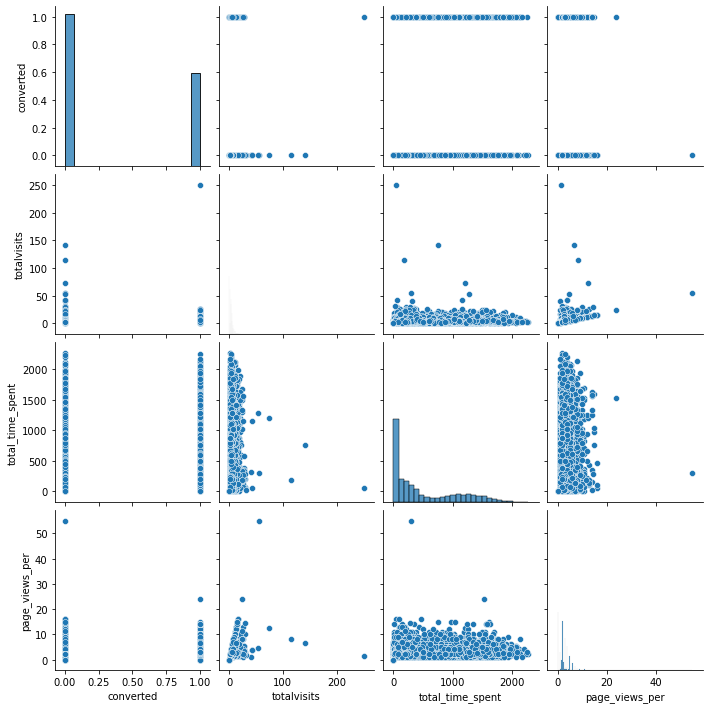

In [37]:
# Plot the pair plot to check the corelation between variable
plt.figure(figsize=(20,15))
sns.pairplot(Leads_Score)
plt.show()

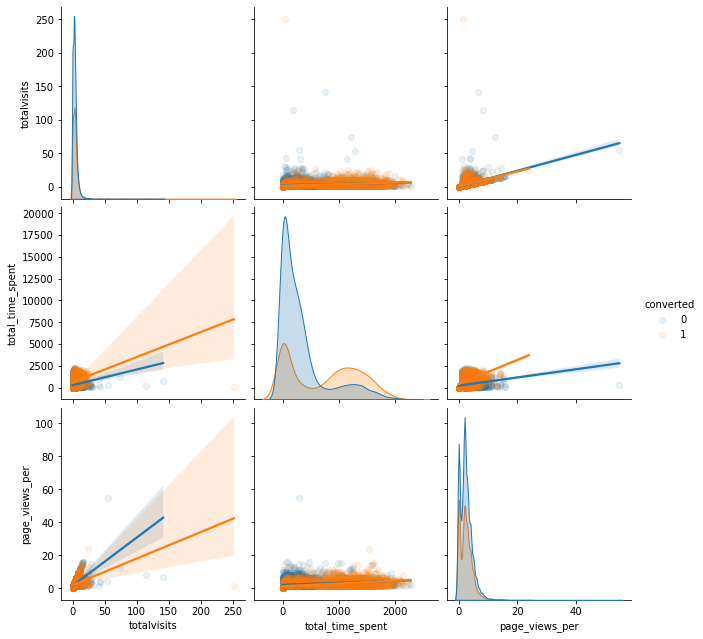

In [38]:
sns.pairplot(data=Leads_Score_New, vars=Leads_Score_New.columns[1:4], hue='converted', kind='reg', height=3,
             plot_kws={'scatter_kws': {'alpha': 0.1}})
plt.show()

#### 5.2 Visualization of correlations using Heat Maps

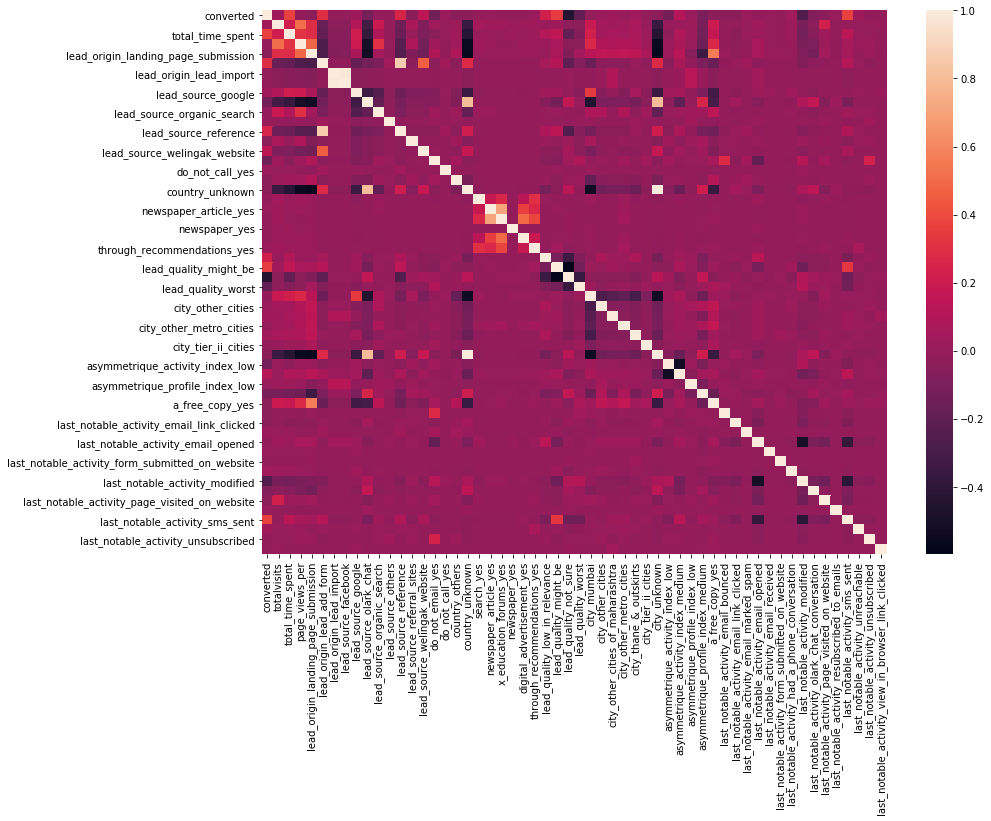

In [39]:
# Correlations
# visualizing correlation by heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(Leads_Score_New.corr())
plt.show()

### Inference: 

#### Following group of columns are positively highly correlated with each other:

Search
Newspaper Article
X Education
Digital Advertisement
Through Recommendations

#### Another set of columns are also positively highly correlated with each other:

TotalVisits
Total Time Spent on Website
Page Views Per Visit

There is a strong positive correlation between Asymmetrique Activity Index and Asymmetrique Profile Index.


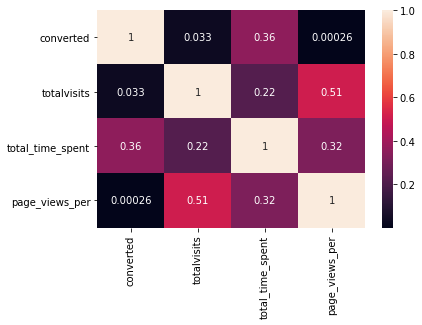

In [40]:
# heatmap of only continuous variables
sns.heatmap(Leads_Score_New[Leads_Score_New.columns[:4]].corr(),annot=True)
plt.show()

In [41]:
# columns pairs in order of highest absolute correlation
Leads_Score_New.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

converted                            converted                              1.000000
lead_source_facebook                 lead_origin_lead_import                0.983684
lead_source_reference                lead_origin_lead_add_form              0.866191
lead_source_olark_chat               city_unknown                           0.803772
newspaper_article_yes                x_education_forums_yes                 0.707068
lead_quality_might_be                lead_quality_not_sure                  0.597667
country_unknown                      lead_origin_landing_page_submission    0.566471
lead_origin_landing_page_submission  a_free_copy_yes                        0.564863
page_views_per                       country_unknown                        0.556781
city_mumbai                          country_unknown                        0.536886
lead_origin_landing_page_submission  lead_source_olark_chat                 0.528424
asymmetrique_activity_index_low      asymmetrique_activity_index_

In [42]:
# Dropping variables with high multi-collinearity
Leads_Score_New.drop(['lead_source_facebook', 'lead_origin_lead_add_form', 'lead_source_olark_chat'], axis=1, inplace=True)

# Top 5 features correlated with target variable
Leads_Score_New.corr()['converted'].abs().sort_values(ascending=False).head(6)[1:]

lead_quality_not_sure             0.443920
last_notable_activity_sms_sent    0.360233
total_time_spent                  0.359261
lead_quality_might_be             0.349936
last_notable_activity_modified    0.263532
Name: converted, dtype: float64

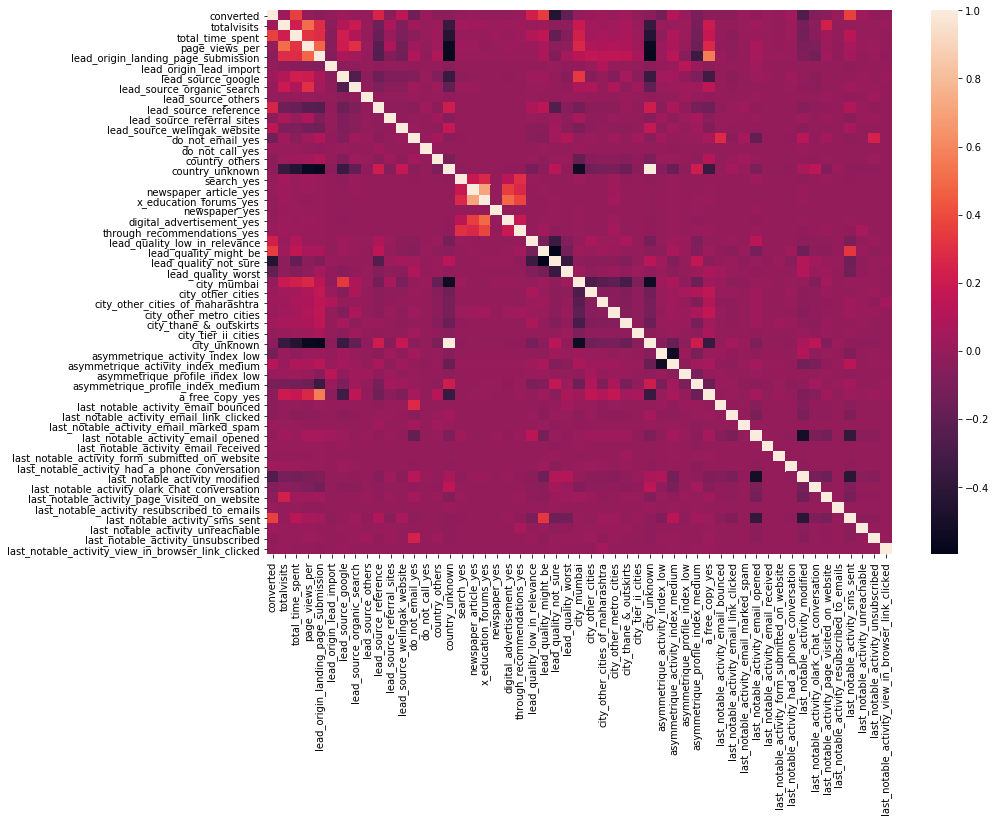

In [43]:
# visualizing correlation by heatmap after dropping high multi-collinearity
plt.figure(figsize=(14, 10))
sns.heatmap(Leads_Score_New.corr())
plt.show()

In [44]:
Leads_Score_New.head()

,converted,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_import,lead_source_google,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,do_not_call_yes,country_others,country_unknown,search_yes,newspaper_article_yes,x_education_forums_yes,newspaper_yes,digital_advertisement_yes,through_recommendations_yes,lead_quality_low_in_relevance,lead_quality_might_be,lead_quality_not_sure,...,city_other_cities_of_maharashtra,city_other_metro_cities,city_thane_&_outskirts,city_tier_ii_cities,city_unknown,asymmetrique_activity_index_low,asymmetrique_activity_index_medium,asymmetrique_profile_index_low,asymmetrique_profile_index_medium,a_free_copy_yes,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### 6. Checking for outliers

In [45]:
Leads_Score_New.nunique()

converted                                                2
totalvisits                                             41
total_time_spent                                      1717
page_views_per                                         114
lead_origin_landing_page_submission                      2
lead_origin_lead_import                                  2
lead_source_google                                       2
lead_source_organic_search                               2
lead_source_others                                       2
lead_source_reference                                    2
lead_source_referral_sites                               2
lead_source_welingak_website                             2
do_not_email_yes                                         2
do_not_call_yes                                          2
country_others                                           2
country_unknown                                          2
search_yes                                              

#### 6.1 Visualizing outliers with Box Plot

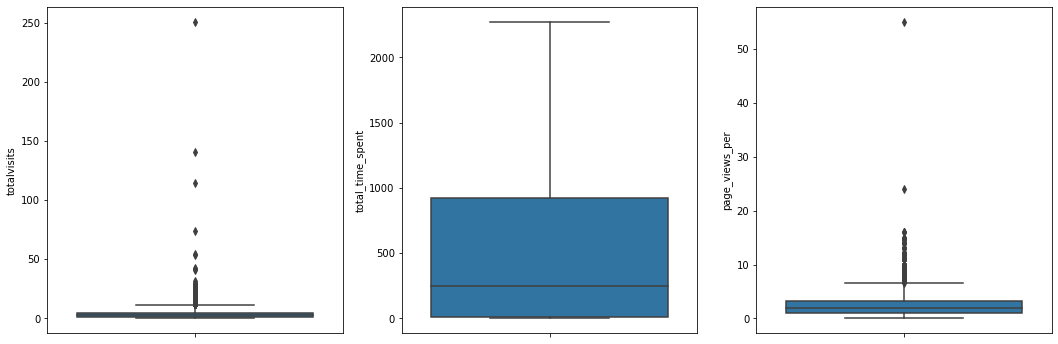

In [46]:
# Plot the box plot to check the outliers in the dataset
cols = ['totalvisits', 'total_time_spent', 'page_views_per']
plt.figure(figsize=(18,6))

i = 1
for col in cols:
    plt.subplot(1,3,i)
    sns.boxplot(y=col, data=Leads_Score)
    i+=1

### Inference: 

#### Total visits
- The median is low as between 0 to 1.
- Here we can see few outliers beyond 50

#### Total time spent
- The median lies between 0 to 500. Leads spending more time on the website are more likely to be converted. 
- Website should be made more engaging to make leads spend more time. 

#### Page view per visit
- The median lies between 0 to 10.
- The leads are more concentrated in the range between 9 to 20
- Here we can also see that there are a couple of outliers when the page views is beyond 20.

#### 7. Univariate Analysis
#### 7.1 Univariate analysis on categorical columns

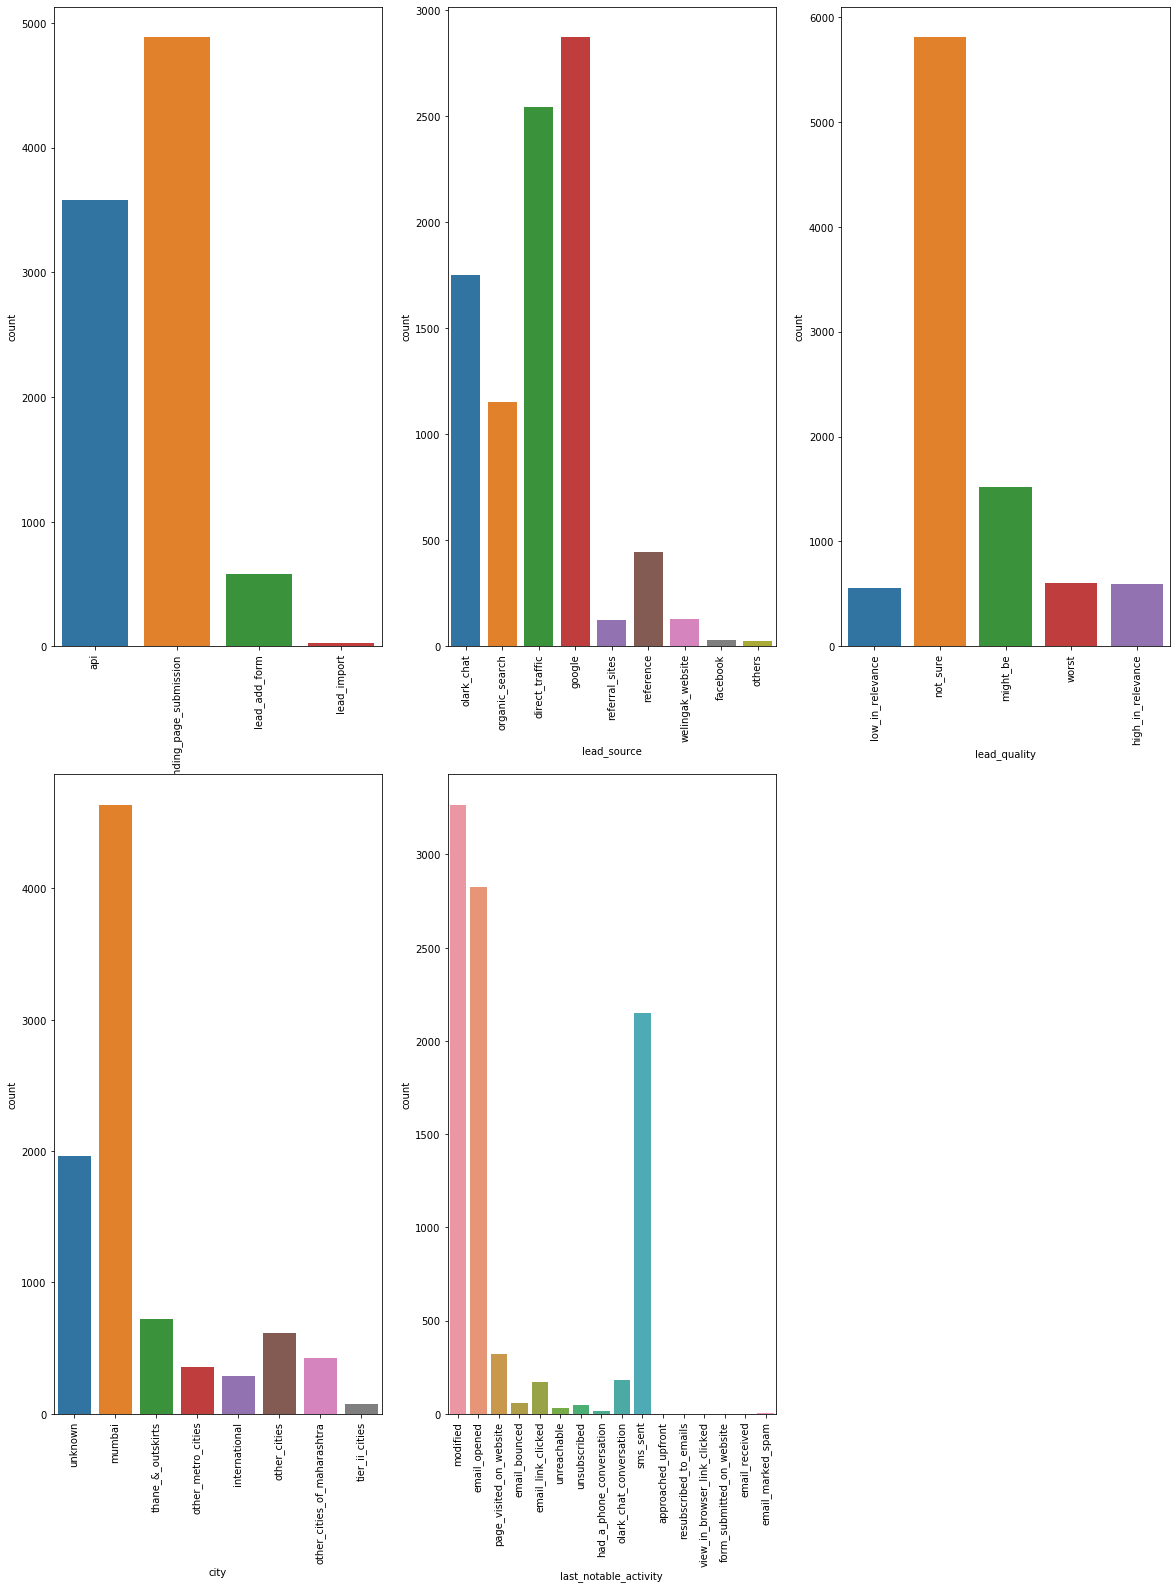

In [48]:
# Plotting count plot for categorical columns
catg_var = ['lead_origin','lead_source','lead_quality','city','last_notable_activity']
plt.figure(figsize = (20,40))
i = 1
for col in catg_var:
    plt.subplot(3,3,i)
    sns.countplot(x = col , data = Leads_Score)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

### Inference
- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Import and Quick Add Form get very few leads.
- In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.
- Maximum number of leads are generated by Google and Direct traffic.
- Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.
- For Lead quality, the highest number of leads is for not_sure and the least being 3 categories i.e. low in relevance, worst and high in relevance
- The number of leads is highest for Mumbai  and least for international followed by tier 2 cities
- The number of leads for the category last notable activity is highest for modified and least foe had a phone conversation.
- Other categories like resubscribed to emails, view in browser link clicked , email, maeked spam etc have no leads

#### 7.2 Univariate analysis on numerical columns

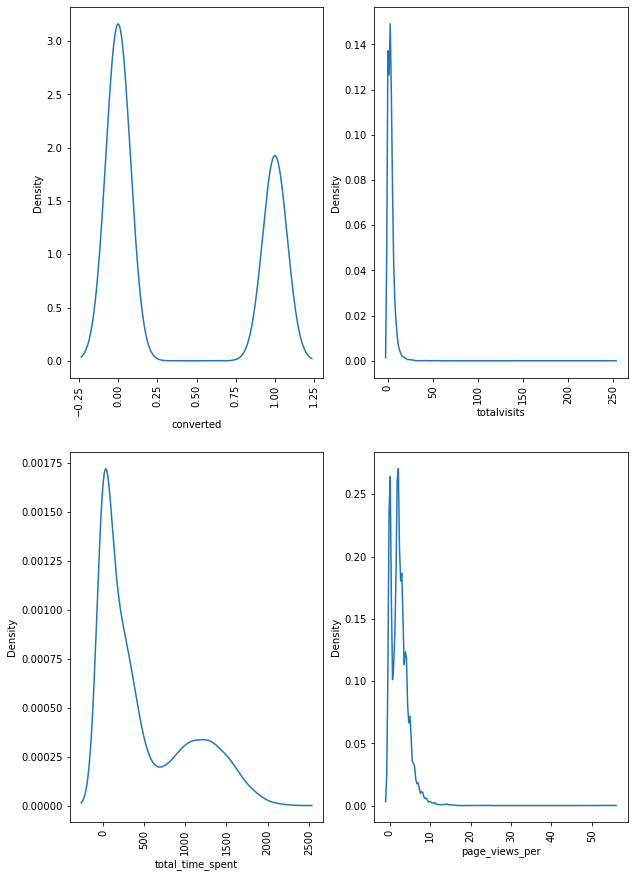

In [49]:
# Plotting dist plot for numerical columns
num_var = ['converted','totalvisits', 'total_time_spent', 'page_views_per']
plt.figure(figsize = (10,15))
i = 1
for col in num_var:
    plt.subplot(2,2,i)
    sns.distplot(Leads_Score[col],hist=False)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

### Inference:

- The conversion rate is high when the no of total visits falls between 0 to 20(approx.) beyind which there is no conversion.
- The conversion rate can be seen increasing for the total time spent at the point of origination, it increases and is at its peak between 0 to 500 and further starts falling and the curve is flat once the total time spent falls beyond 2000.
- Page views have a ‘zero’ conversion rate in the band within the band 0 to 10 , post which it declines to   zero.

#### 8. Bivariate analysis 
#### 8.1 Bivariate analysis on categorical columns

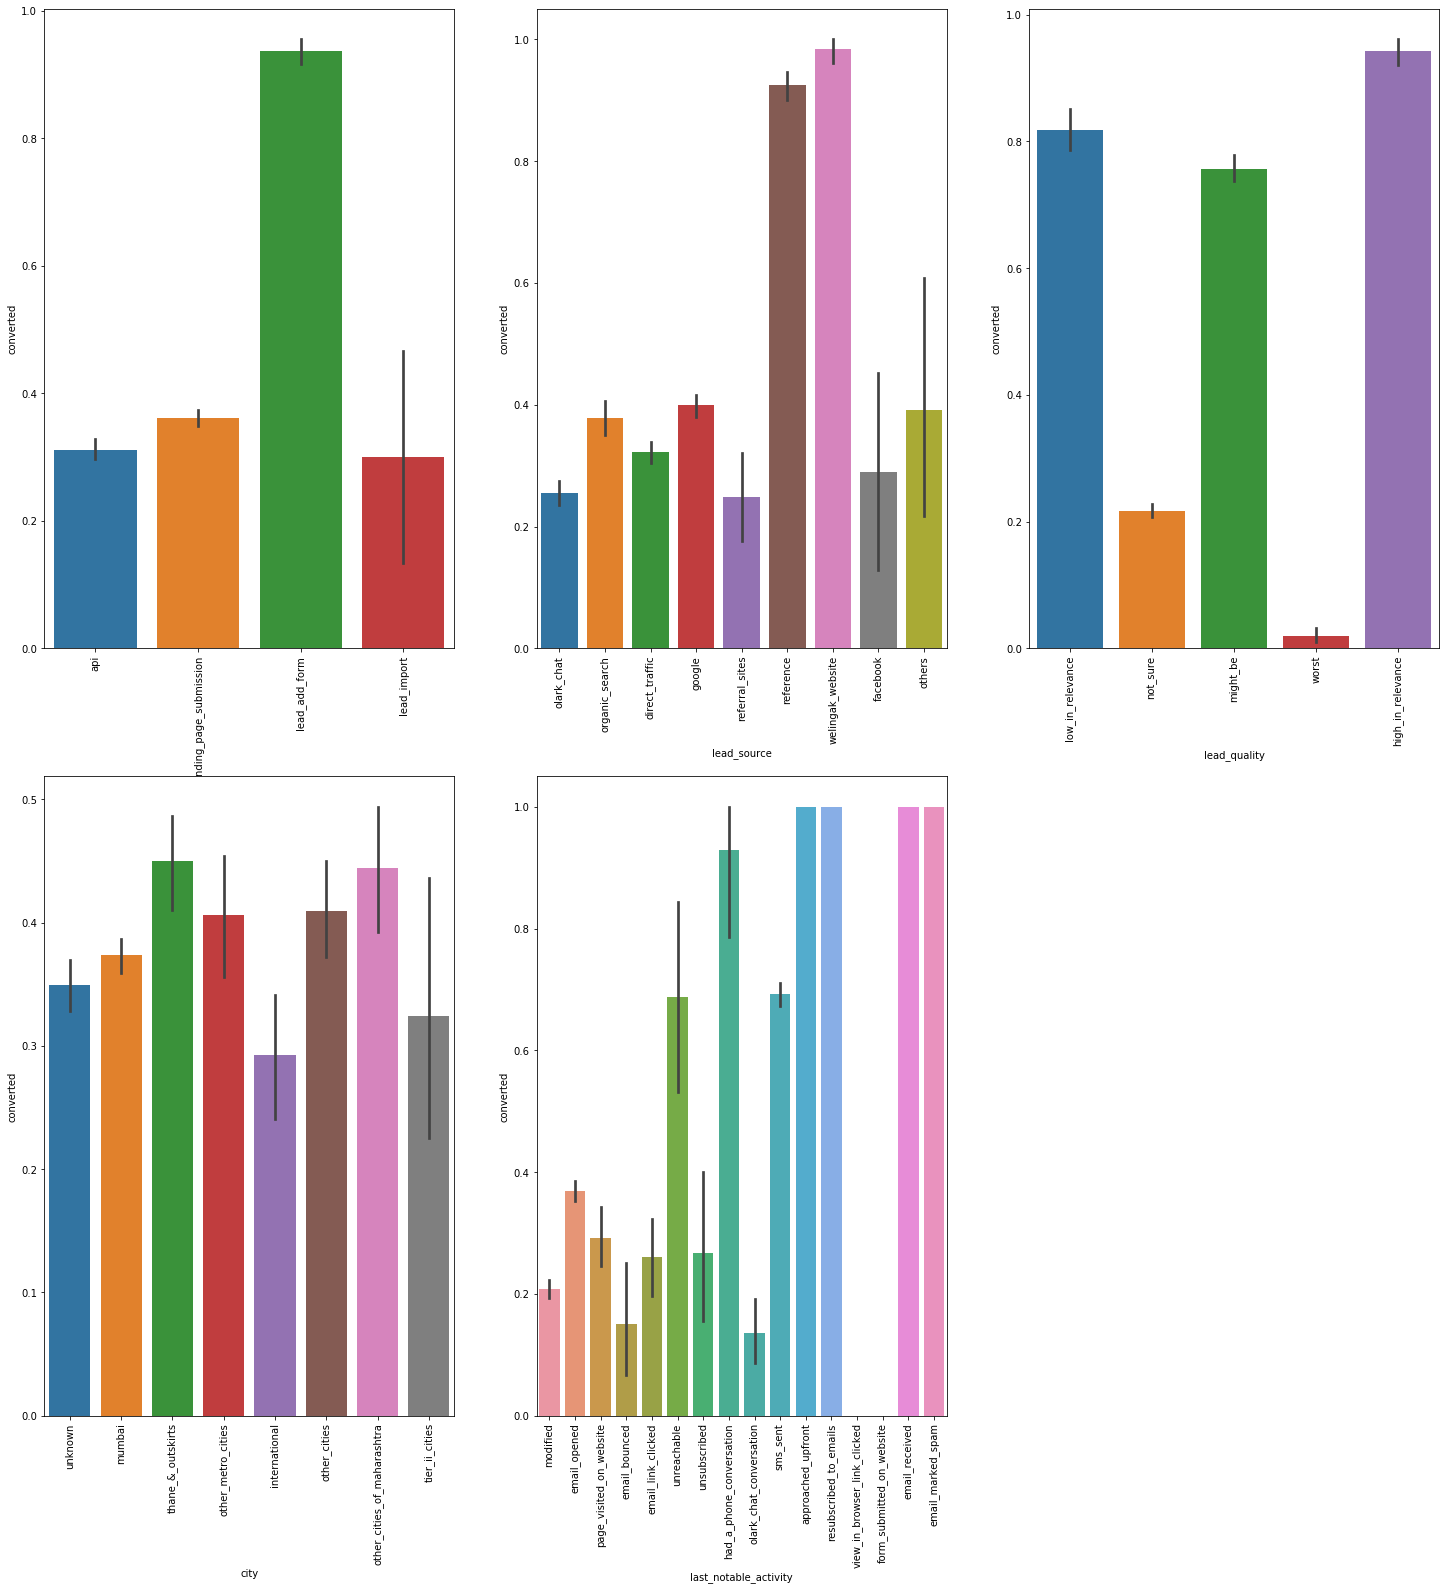

In [50]:

# Plotting box plot for categorical columns
catg_var = ['lead_origin','lead_source','lead_quality','city','last_notable_activity']
plt.figure(figsize=(25,40))
for i in enumerate(catg_var):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(data=Leads_Score, x=i[1], y='converted')
    plt.xticks(rotation=90)
plt.show()

### Inference:

- In Lead Origin, maximum conversion happened from lead add form whereas API was the least.
- In the Lead Source, major conversion is from wellingak website.
- In terms of lead quality, high in relevance has the highest conversion wherein worst tends to be lowest.
- For the category city, Thane and outskirts has the highest conversion and International being the least.
- With regard to last notable activity , approached upfront, resubscribed to emails, email received, email marked spam ; seem to have the same conversion rate.
- However view in browser link clicked and form submitted on website have zero conversion rate.

#### 8.2 Bivariate analysis on numerical columns

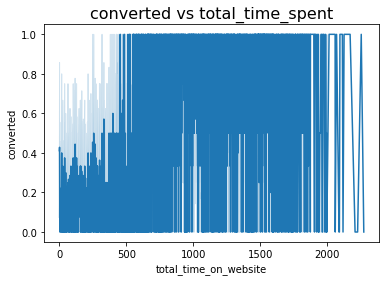

In [51]:
# Plotting scatter plot for converted vs total_time_spent
plt.title("converted vs total_time_spent",fontsize=16)
sns.lineplot(data=Leads_Score,x="total_time_spent",y='converted')
plt.xlabel("total_time_on_website")
plt.show()

### Inference:

- As the total time spent increases the conversion rate also moves in the same direction and vice – versa.


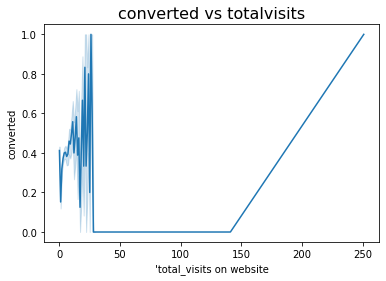

In [52]:
# Plotting scatter plot for converted vs total_time_spent
plt.title("converted vs totalvisits",fontsize=16)
sns.lineplot(data=Leads_Score,x="totalvisits",y='converted')
plt.xlabel("'total_visits on website")
plt.show()

### Inference:

- The total visits on the website is seen to be increasing with the peak at 40 approx. and further the curve is flat beyond this point.
- Again we can observe that, when the total visits on website is around 150 there can be seen a steep increase in the curve upto and beyond 250. 

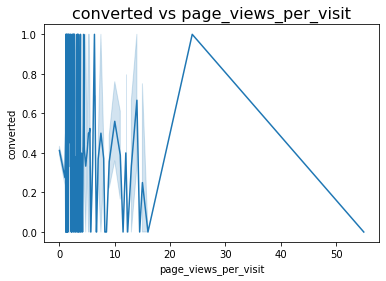

In [53]:
# Plotting scatter plot for converted vs total_time_spent
plt.title("converted vs page_views_per_visit",fontsize=16)
sns.lineplot(data=Leads_Score,x="page_views_per",y='converted')
plt.xlabel("page_views_per_visit")
plt.show()

### Inference:

- When the page views per visit falls between 0 to 18 (approx.) , there are a series of highs and lows. 
- On reaching this point, the curve starts rising and reaches it peak when page views are around 22 and post which the curve declines steeply and falls beyond 50.

#### 9. Model Building

In [54]:
# Checking the shape of data before splitting
Leads_Score_New.shape

(9074, 53)

In [55]:
X = Leads_Score_New.drop(['converted'],axis=1)
X.head()

,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_import,lead_source_google,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,do_not_call_yes,country_others,country_unknown,search_yes,newspaper_article_yes,x_education_forums_yes,newspaper_yes,digital_advertisement_yes,through_recommendations_yes,lead_quality_low_in_relevance,lead_quality_might_be,lead_quality_not_sure,lead_quality_worst,...,city_other_cities_of_maharashtra,city_other_metro_cities,city_thane_&_outskirts,city_tier_ii_cities,city_unknown,asymmetrique_activity_index_low,asymmetrique_activity_index_medium,asymmetrique_profile_index_low,asymmetrique_profile_index_medium,a_free_copy_yes,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [56]:
#y to contain only target variable
y=Leads_Score_New['converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

#### 9.1 Perform Train Test Split

In [57]:
#Train Test split with 70:30 ratio
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### 9.2 Perform Scaling

In [58]:
# Create list of numeric variables
scaled_vars = X_train.columns

# Scale the three numeric features
scaler = MinMaxScaler()
X_train[scaled_vars] = scaler.fit_transform(X_train[scaled_vars])
X_test[scaled_vars] = scaler.transform(X_test[scaled_vars])

In [59]:
X_train.head()

,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_import,lead_source_google,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,do_not_call_yes,country_others,country_unknown,search_yes,newspaper_article_yes,x_education_forums_yes,newspaper_yes,digital_advertisement_yes,through_recommendations_yes,lead_quality_low_in_relevance,lead_quality_might_be,lead_quality_not_sure,lead_quality_worst,...,city_other_cities_of_maharashtra,city_other_metro_cities,city_thane_&_outskirts,city_tier_ii_cities,city_unknown,asymmetrique_activity_index_low,asymmetrique_activity_index_medium,asymmetrique_profile_index_low,asymmetrique_profile_index_medium,a_free_copy_yes,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
3009,0.007968,0.178347,0.083333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,0.007968,0.085355,0.083333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9226,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4750,0.007968,0.619946,0.083333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7987,0.019920,0.711590,0.104167,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 9.3 Build Logistic Regression Model using RFE

In [60]:
# Build a Logistic Regression model using SKLearn for RFE
Log_Reg = LogisticRegression()
Log_Reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
#Cut down number of features to 15 using automated approach
rfe = RFE(Log_Reg,15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [62]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('totalvisits', True, 1),
 ('total_time_spent', True, 1),
 ('page_views_per', True, 1),
 ('lead_origin_landing_page_submission', False, 7),
 ('lead_origin_lead_import', False, 10),
 ('lead_source_google', False, 28),
 ('lead_source_organic_search', False, 20),
 ('lead_source_others', False, 12),
 ('lead_source_reference', True, 1),
 ('lead_source_referral_sites', False, 6),
 ('lead_source_welingak_website', True, 1),
 ('do_not_email_yes', True, 1),
 ('do_not_call_yes', False, 5),
 ('country_others', False, 32),
 ('country_unknown', True, 1),
 ('search_yes', False, 11),
 ('newspaper_article_yes', False, 18),
 ('x_education_forums_yes', False, 29),
 ('newspaper_yes', False, 9),
 ('digital_advertisement_yes', False, 26),
 ('through_recommendations_yes', False, 17),
 ('lead_quality_low_in_relevance', False, 8),
 ('lead_quality_might_be', True, 1),
 ('lead_quality_not_sure', True, 1),
 ('lead_quality_worst', True, 1),
 ('city_mumbai', False, 31),
 ('city_other_cities', False, 21),
 ('city_

In [63]:
#5.4. Build a Model using Manual elimination

#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    
# Add a constant
    X_train_sm = sm.add_constant(X_train[cols]) 

# Create a first fitted model
    logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    res = logm1.fit()
    print(res.summary())

In [64]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [65]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['totalvisits', 'total_time_spent', 'page_views_per',
       'lead_source_reference', 'lead_source_welingak_website',
       'do_not_email_yes', 'country_unknown', 'lead_quality_might_be',
       'lead_quality_not_sure', 'lead_quality_worst',
       'asymmetrique_activity_index_low',
       'last_notable_activity_had_a_phone_conversation',
       'last_notable_activity_sms_sent', 'last_notable_activity_unreachable',
       'last_notable_activity_unsubscribed'],
      dtype='object')

In [66]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[~rfe.support_]

Index(['lead_origin_landing_page_submission', 'lead_origin_lead_import',
       'lead_source_google', 'lead_source_organic_search',
       'lead_source_others', 'lead_source_referral_sites', 'do_not_call_yes',
       'country_others', 'search_yes', 'newspaper_article_yes',
       'x_education_forums_yes', 'newspaper_yes', 'digital_advertisement_yes',
       'through_recommendations_yes', 'lead_quality_low_in_relevance',
       'city_mumbai', 'city_other_cities', 'city_other_cities_of_maharashtra',
       'city_other_metro_cities', 'city_thane_&_outskirts',
       'city_tier_ii_cities', 'city_unknown',
       'asymmetrique_activity_index_medium', 'asymmetrique_profile_index_low',
       'asymmetrique_profile_index_medium', 'a_free_copy_yes',
       'last_notable_activity_email_bounced',
       'last_notable_activity_email_link_clicked',
       'last_notable_activity_email_marked_spam',
       'last_notable_activity_email_opened',
       'last_notable_activity_email_received',
       'la

In [67]:
# Taking 15 columns supported by RFE for regression
X_train_RFE = X_train[['totalvisits', 'total_time_spent', 'page_views_per',
       'lead_source_reference', 'lead_source_welingak_website',
       'do_not_email_yes', 'country_unknown', 'lead_quality_might_be',
       'lead_quality_not_sure', 'lead_quality_worst',
       'asymmetrique_activity_index_low',
       'last_notable_activity_had_a_phone_conversation',
       'last_notable_activity_sms_sent', 'last_notable_activity_unreachable',
       'last_notable_activity_unsubscribed']]

#### 10. Model 1

In [68]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['totalvisits', 'total_time_spent', 'page_views_per',
       'lead_source_reference', 'lead_source_welingak_website',
       'do_not_email_yes', 'country_unknown', 'lead_quality_might_be',
       'lead_quality_not_sure', 'lead_quality_worst',
       'asymmetrique_activity_index_low',
       'last_notable_activity_had_a_phone_conversation',
       'last_notable_activity_sms_sent', 'last_notable_activity_unreachable',
       'last_notable_activity_unsubscribed']
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2205.9
Date:                Wed, 11 Aug 2021   Deviance:                       4411.8
Time:                        12:22:39   Pearson chi2:                 6.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

#### All the p-values are now in the appropriate range.

#### 11. Fitting Model

In [69]:
# Cross Validation
scores = cross_validate(Log_Reg, X_train[scaled_vars], y_train, return_train_score=True, cv=5, scoring=['accuracy'])
print(f"Cross validated mean accuracy: {round(scores['test_accuracy'].mean(), 3)}")

Log_Reg.fit(X_train[scaled_vars], y_train)
pred = Log_Reg.predict(X_train[scaled_vars])
prob_est = Log_Reg.predict_proba(X_train[scaled_vars])

Cross validated mean accuracy: 0.848


****
Measuring Model Performance
***
The data available at hand has class imbalance and therefore accuracy is not a good enough metric to measure if model is good enough.

Sensitivity (Recall) tells us what percentage of leads that were converted, were correctly identified as converted.

Specificity tells is what percentage of leads that were NOT converted were correctly identified.

Precision is, given a positive test result, the sample is positive.

If correctly identifying positives is important for us, then we should choose a model with higher Sensitivity. However, if correctly identifying negatives is more important, then we should choose specificity as the measurement metric.

F1 score is the weighted average of the precision and recall, and is a good metric to hold the model against.

Sensitivity (Recall): 0.7563368765331153
Specificity: 0.9075544174135723
Precision: 0.8367254635911352
F-Score: 0.7945028988619283


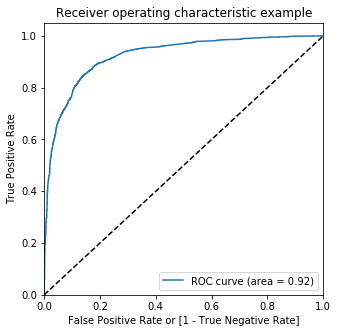

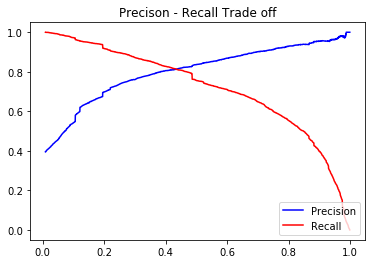

In [70]:
def draw_roc(actual_values, probability_estimates):
    fpr, tpr, thresholds = roc_curve(actual_values, probability_estimates, drop_intermediate=False)
    auc_score = roc_auc_score(actual_values, probability_estimates)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f"ROC curve (area = {round(auc_score, 2)})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

def draw_prec_recall(actual_values, probability_estimates):
    
    p, r, thresholds = precision_recall_curve(actual_values, probability_estimates)
    plt.plot(thresholds, p[:-1], "b-", label="Precision")
    plt.plot(thresholds, r[:-1], "r-", label="Recall")
    plt.title("Precison - Recall Trade off")
    plt.legend(loc="lower right")
    plt.show()

def get_metrics(y, pred, prob_est):
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
    precision = precision_score(y, pred)
    recall = recall_score(y, pred)
    f = f1_score(y, pred)

    # Sensitivity, Specificity
    print(f"Sensitivity (Recall): {recall}\nSpecificity: {tn/(tn+fp)}\nPrecision: {precision}\nF-Score: {f}")

    # Reciever Operating Characteristic Curve
    draw_roc(y, prob_est[:, 1])

    # Precision Recall Curve
    draw_prec_recall(y, prob_est[:, 1])
    
get_metrics(y_train, pred, prob_est)

#### 12. Finding Optimal Cut-Off

In [71]:

# Making y_train_pred_final
y_train_pred_final = pd.DataFrame({'Converted':y_train, 'probability': prob_est[:, 1]})
numbers = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

# Making cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df['var'] = np.var([cutoff_df.accuracy, cutoff_df.sensi, cutoff_df.speci], axis=0)

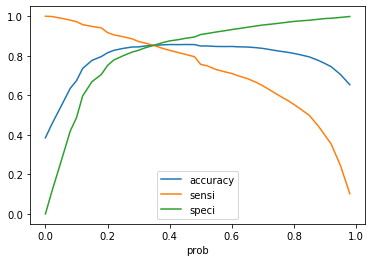

Optimum cut-off value is: 0.35


In [72]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

cutoff_value = cutoff_df.sort_values('var').head(1)['prob'].values[0]
print(f"Optimum cut-off value is: {cutoff_value}")

Accuracy: 0.8529365454259171
Sensitivity (Recall): 0.8520032706459526
Specificity: 0.8535211267605634
Precision: 0.7846385542168675
F-Score: 0.8169345354762838


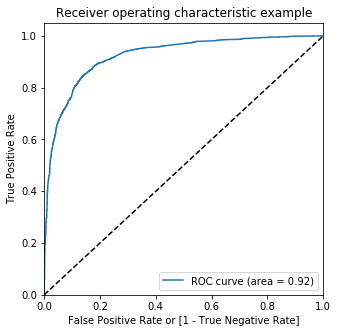

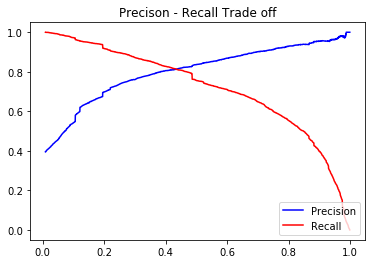

In [73]:
# new predicted values based on cut-off
pred = (Log_Reg.predict_proba( X_train[scaled_vars])[:, 1] >= cutoff_value).astype(int)
print(f"Accuracy: {accuracy_score(y_train, pred)}")
get_metrics(y_train, pred, prob_est)

#### 13.  Measuring Performance on Test Set

accuracy:0.8431876606683805
Sensitivity (Recall): 0.8260869565217391
Specificity: 0.8529411764705882
Precision: 0.7621268656716418
F-Score: 0.7928190198932556


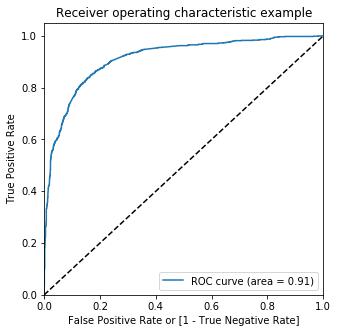

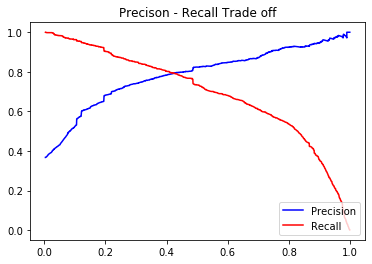

In [74]:
# Scoring against Test Set
Log_Reg.fit(X_train[scaled_vars], y_train)
pred = (Log_Reg.predict_proba( X_test[scaled_vars])[:, 1] >= cutoff_value).astype(int)
prob_est = Log_Reg.predict_proba(X_test[scaled_vars])
print(f"accuracy:{accuracy_score(y_test, pred)}")
get_metrics(y_test, pred, prob_est)

### Finally, we have an overall accuracy of about 0.84 on our Logistic Regression model. That is, there is 84.5% chance that our predicted leads will be converted. This meets the CEO's target of atleast 80% lead conversion.

#### 14. Lead Scoring

#### 14.1 We will perform lead-scoring on the test set.

In [75]:
scores = pd.DataFrame({'lead_score':(prob_est[:, 1]*100).astype('int'), 'predicted_outcome': pred, 'actual_outcome': y_test}).reset_index(drop=True)
scores.head()

,lead_score,predicted_outcome,actual_outcome
0,11,0,0
1,96,1,1
2,12,0,0
3,85,1,1
4,5,0,0


#### Following three variables are contributing the most towards the probability of a lead getting converted:
- Page_views_per
- Lead_quality_not_sure
- Total_time_spent

#### Again, based on the coefficient values the following are the top three categorical/dummy variables that should be focused the most in order to increase the probability of lead conversion :
- lead_source_reference   
- lead_source_welingak_website 
- last_notable_activity_had_a_phone_conversation                           

______________________________________________________________________________________________________________________

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 84%, 83% and 85% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data meets 80% Lead Conversion.

### Hence overall this model seems to be good. 
